# Transformers


Install packages


In [11]:
!uv pip install -q \
    transformers==4.57.3 \
    bertviz==1.4.1 \
    xformers==0.0.33.post2 \
    evaluate==0.4.6 \
    numpy==2.3.2 \
    matplotlib==3.10.8

Import packages


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from bertviz.neuron_view import show
from bertviz.transformers_neuron_view import BertModel as BertModelViz
from bertviz.transformers_neuron_view import BertTokenizer as BertTokenizerViz
from transformers import BertModel, BertTokenizer, pipeline

Define model and tokenizer


In [ ]:
model_name = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

Tokenize a sentence


In [ ]:
tokenized = tokenizer("I read a good novel")
tokenized

{'input_ids': [101, 1045, 3191, 1037, 2204, 3117, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

Inspect the tokens


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(tokenized["input_ids"])
tokens

['[CLS]', 'i', 'read', 'a', 'good', 'novel', '[SEP]']

## Positional Encoding


Define encode position function


In [ ]:
def encode_positions(num_tokens, depth, n=10000):
    positional_matrix = np.zeros((num_tokens, depth))
    for row in range(num_tokens):
        for col in np.arange(int(depth / 2)):
            denominator = np.power(n, 2 * col / depth)
            positional_matrix[row, 2 * col] = np.sin(row / denominator)
            positional_matrix[row, 2 * col + 1] = np.cos(row / denominator)
    return positional_matrix

Plot positional matrix


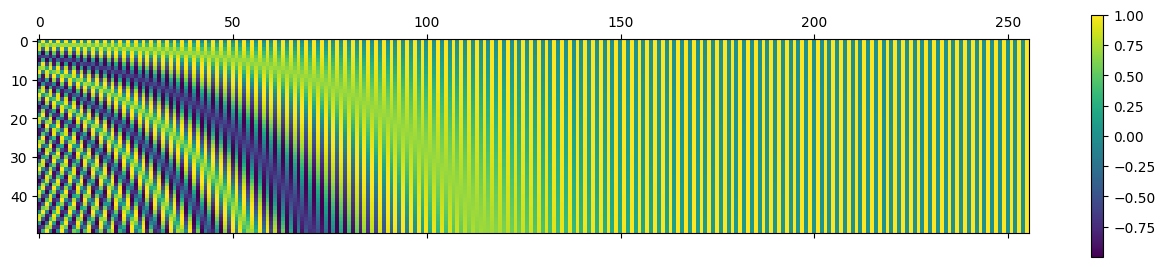

In [ ]:
positional_matrix = encode_positions(50, 256)
fig = plt.matshow(positional_matrix)
plt.gcf().colorbar(fig)
plt.show()

## Self-attention

- [exbert](https://huggingface.co/spaces/exbert-project/exbert)


In [ ]:
tokenizer_viz = BertTokenizerViz.from_pretrained(model_name)
model_viz = BertModelViz.from_pretrained(model_name)
show(model_viz, "bert", tokenizer_viz, "I read a good novel.", head=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GPT 2


In [26]:
generator = pipeline("text-generation", model="gpt2")
generator("I read a good novel.", max_length=30, num_return_sequences=5)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "I read a good novel. I have a lot of friends who are writers, and I read about writers. I am a writer. That is what I do.\n\nI have a lot of friends who are writers, and I read about writers. I am a writer. That is what I do. I read about authors. I am a writer. I am a writer. I am a writer. I am a writer. I am a writer. I am a writer.\n\nI can't say my name, because I feel like I am not the type of person to say it. I can't say my name, because I feel like I am not the type of person to give my name out and shout it out. I can't say my name, because I feel like I am not the type of person to do it.\n\nI really don't want to be around anyone who is not a writer. I want to be around people who are not writers. I want to be around people who are not writers. I want to be around people who are not writers. I want to be around people who are not writers. I want to be around people who are not writers. I want to be around people who are not writers.\n\nI am a writer. I"